In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
#Loading Datasets
titanic  = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [44]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
#Count the number if rows and column in dataset
titanic.shape

(891, 12)

In [46]:
# Description 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
titanic['Survived'].value_counts()                                #### count

0    549
1    342
Name: Survived, dtype: int64

<Axes: ylabel='count'>

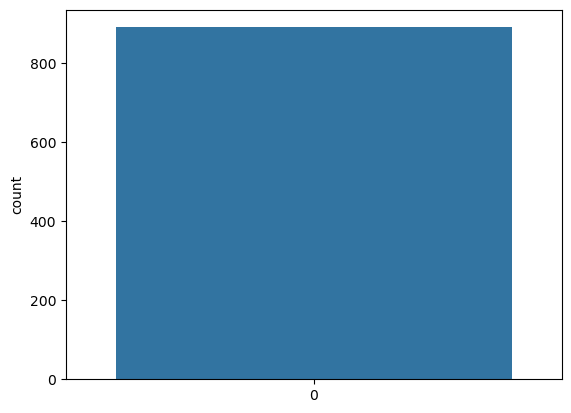

In [48]:
sns.countplot(titanic['Survived'])                         #### visualisation

In [49]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [50]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: xlabel='Sex'>

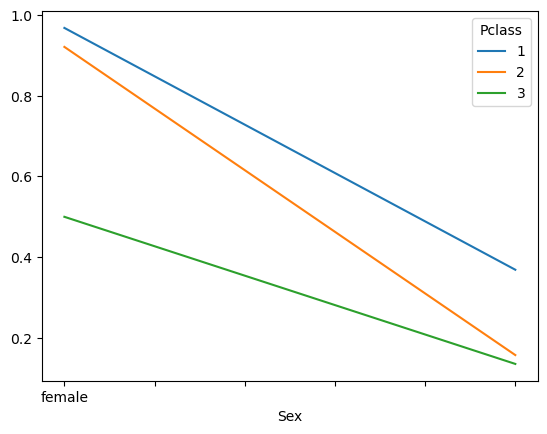

In [51]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass').plot()

<Axes: xlabel='Pclass', ylabel='Survived'>

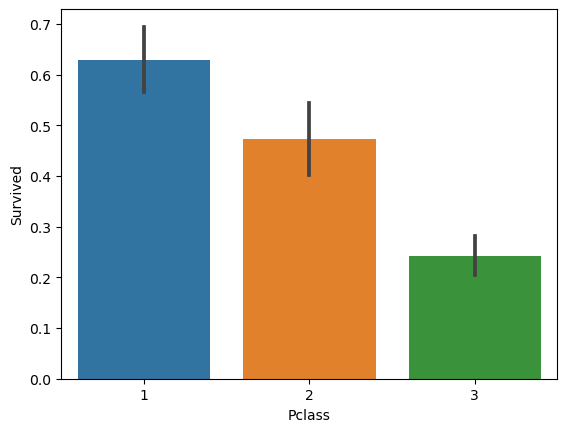

In [52]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

In [53]:
age = pd.cut(titanic['Age'], [0,18,80])
titanic.pivot_table('Survived', ['Sex', 'Age'], 'Pclass')

Pclass          1    2     3
Sex    Age                  
female 0.75   NaN  NaN  1.00
       1.00   NaN  NaN  1.00
       2.00   0.0  1.0  0.25
       3.00   NaN  1.0  0.00
       4.00   NaN  1.0  1.00
...           ...  ...   ...
male   70.00  0.0  0.0   NaN
       70.50  NaN  NaN  0.00
       71.00  0.0  NaN   NaN
       74.00  NaN  NaN  0.00
       80.00  1.0  NaN   NaN

[145 rows x 3 columns]

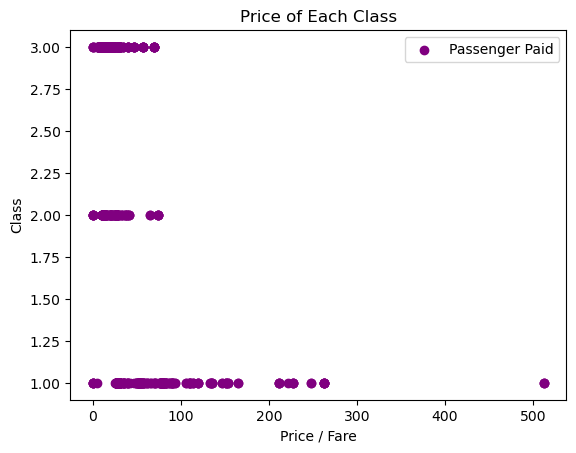

In [54]:
plt.scatter(titanic['Fare'], titanic['Pclass'], color='purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [55]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
for val in titanic:
    print(titanic[val].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtyp

In [57]:
#Drop the columns
titanic = titanic.drop(['Cabin', 'Ticket','PassengerId'], axis=1)

In [58]:
titanic = titanic.drop(['Name'], axis=1)

In [59]:
#Remove the rows with missing value
titanic = titanic.dropna(subset=['Embarked', 'Age'])

# titanic['embarked'] = titanic['embarked'].fillna('S')
# titanic['age'] = titanic['age'].fillna(float(int(titanic['age'].mean())))

In [60]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [61]:
titanic.shape

(712, 8)

In [62]:
#Look at the datatype
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [63]:
#Print the unique values
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [64]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode the sex column
titanic.iloc[:,2] = labelencoder.fit_transform(titanic.iloc[:,2]. values)

#Encode the embarked column
titanic.iloc[:,7] = labelencoder.fit_transform(titanic.iloc[:,7]. values)

In [65]:
#Print the unique values
print(titanic['Sex'].unique())
print(titanic['Embarked'].unique())

[1 0]
[2 0 1]


In [66]:
#Look at the datatype
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [67]:
#Slit the data into independent 'X' and Dependent 'Y'

X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [68]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [69]:
def models(X_train, Y_train):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #Use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #Use SVM
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Use Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, Y_train)
    
    #Print the training accuracy for each model
    print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1]K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
    print('[2]SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4]Gaussian NB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6]Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [70]:
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  0.7978910369068541
[1]K Neighbors Training Accuracy:  0.8664323374340949
[2]SVC Linear Training Accuracy:  0.7768014059753954
[3]SVC RBF Training Accuracy:  0.8506151142355008
[4]Gaussian NB Training Accuracy:  0.8031634446397188
[5]Decision Tree Training Accuracy:  0.9929701230228472
[6]Random Forest Training Accuracy:  0.9753954305799648


In [71]:
from sklearn.metrics import confusion_matrix

for i in range( len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    #Extract TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('Model [{}] Testing Accuracy = {}'.format(i, test_score ))
    print()

[[75  7]
 [19 42]]
Model [0] Testing Accuracy = 0.8181818181818182

[[67 15]
 [20 41]]
Model [1] Testing Accuracy = 0.7552447552447552

[[70 12]
 [18 43]]
Model [2] Testing Accuracy = 0.7902097902097902

[[75  7]
 [22 39]]
Model [3] Testing Accuracy = 0.7972027972027972

[[69 13]
 [27 34]]
Model [4] Testing Accuracy = 0.7202797202797203

[[54 28]
 [12 49]]
Model [5] Testing Accuracy = 0.7202797202797203

[[73  9]
 [14 47]]
Model [6] Testing Accuracy = 0.8391608391608392



In [72]:
import numpy as np
forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance':np.round(forest.feature_importances_, 3)} ) 
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
Age,0.300
Fare,0.296
Sex,0.183
Pclass,0.098
SibSp,0.050
Parch,0.044
Embarked,0.030


<Axes: xlabel='feature'>

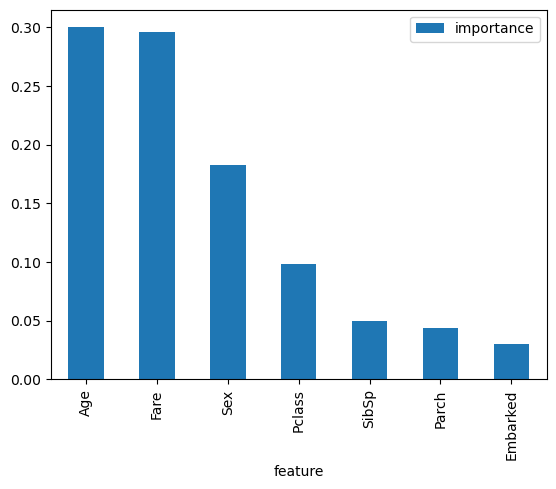

In [73]:
importances.plot.bar()

In [74]:
#print the prediction of random forest classifier 
pred = model[6].predict(X_test)
print(pred)

print()
#Actual Values
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [75]:
#my_survival = [[1, 1, 21, 0, 0, 0, 1 ]]  # <-- Didn't Survived

my_survival = [[1, 1, 22, 0, 0, 150, 0 ]]   # <-- Survived

#Print predict my survial using Random Forest Classifier
pred = model[6].predict(my_survival)
print(pred)

if pred == 0:
    print('Oh no! You did not make it.')
else:
    print('Nice! You Survived')

[1]
Nice! You Survived


In [76]:
import pickle

pickle.dump(model[6], open('titanic_model.pickle', 'wb'))

In [77]:
model = pickle.load(open('titanic_model.pickle', 'rb'))

In [78]:
my_survival = [[1, 1, 22, 0, 0, 150, 0 ]]
pred = model.predict(my_survival)
print(pred)

if pred == 0:
    print('Oh no! You did not make it.')
else:
    print('Nice! You Survived')

[1]
Nice! You Survived
